In [1]:
import numpy as np

from astropy.io import ascii

import tracepol

import matplotlib.pyplot as plt

# This notebooks demonstrates the use of the trace polynomial solutions.

First we need to compute the polynomial parameters.

In [2]:
tracepars = tracepol.get_tracepars()
tracepars

/home/talens-irex/Research/GitHub/jwst-mtl/SOSS/trace/tracepol.py:104: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/home/talens-irex/Research/GitHub/jwst-mtl/SOSS/trace/tracepol.py:104: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)


{-1.0: {'spatpars': array([-5.24519204e-02,  2.22904379e+00, -4.32888557e+01,  5.08860325e+02,
         -4.04235270e+03,  2.29440819e+04, -9.59210461e+04,  3.00046667e+05,
         -7.06081005e+05,  1.24597339e+06, -1.62895450e+06,  1.54194290e+06,
         -1.01618645e+06,  4.35616257e+05, -1.06419286e+05,  1.08603835e+04]),
  'specpars': array([-2.46280641e-02,  1.05494913e+00, -2.06807350e+01,  2.45780481e+02,
         -1.97726695e+03,  1.13851702e+04, -4.83726069e+04,  1.54060310e+05,
         -3.69831179e+05,  6.67117190e+05, -8.93696308e+05,  8.69524964e+05,
         -5.91665778e+05,  2.63826157e+05, -6.90450892e+04,  6.61463042e+03]),
  'specmin': -6219.576035308639,
  'specmax': -1440.2427429179145,
  'wavepars': array([-1.55773443e-54, -8.11509204e-50, -1.87662206e-45, -2.49378154e-41,
         -2.01518673e-37, -8.75720385e-34,  2.54061889e-31,  3.25175640e-26,
          2.52338976e-22,  1.15439297e-18,  3.63729204e-15,  8.21129840e-12,
          1.33068070e-08,  1.51284479e-0

To verify the polynomial solutions we evaluate the and plot them.

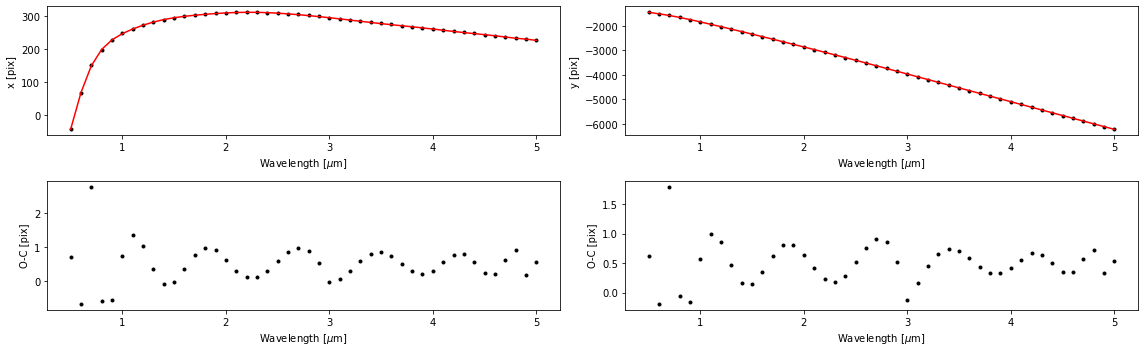

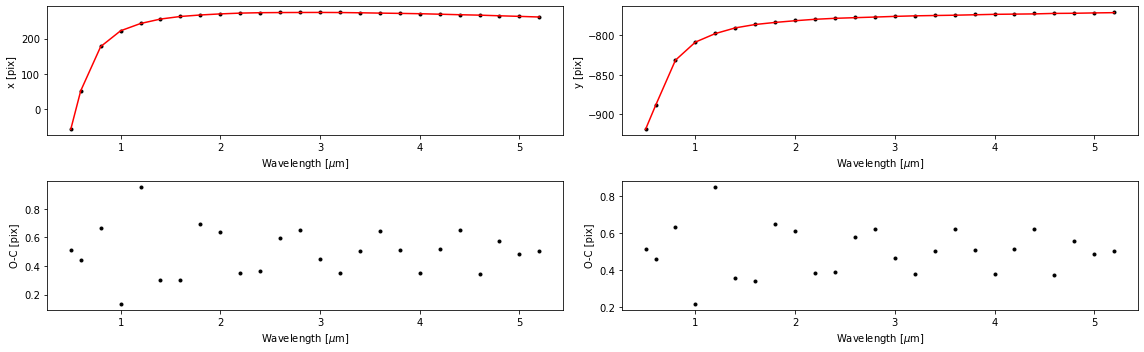

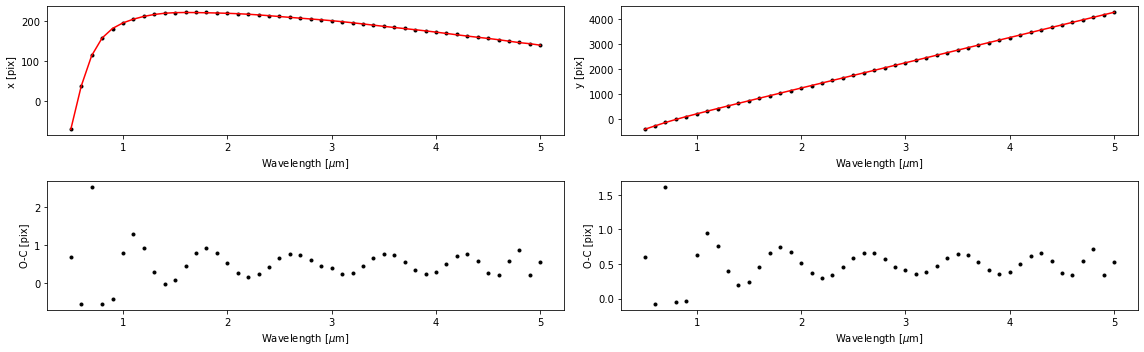

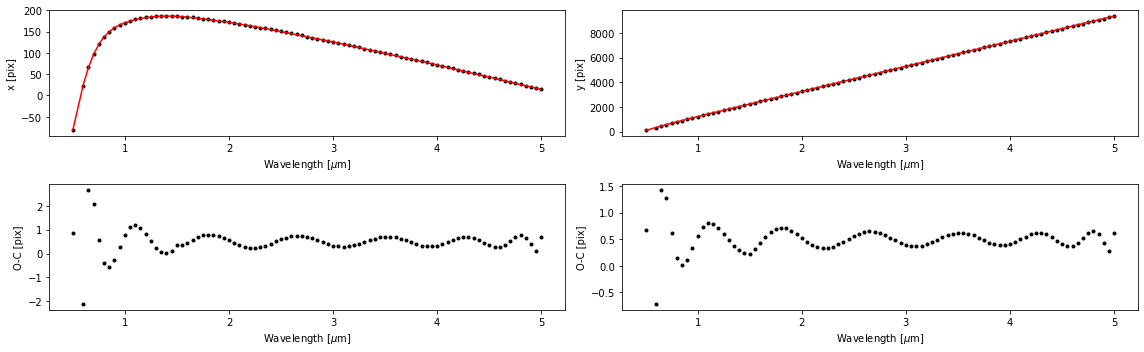

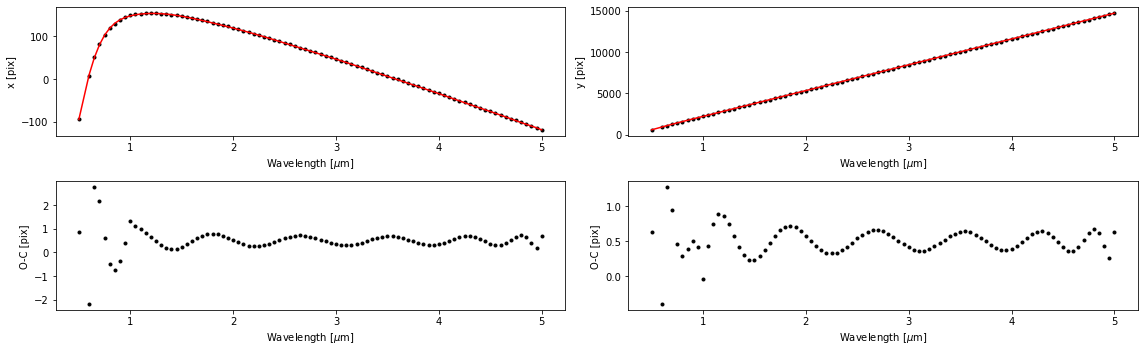

In [3]:
# Read the trace.
trace = ascii.read('NIRISS_GR700_trace_extended.csv')
trace['xpos'] /= 0.018
trace['ypos'] /= 0.018

# Plot the transformation to x, y for different m.
for m in [-1, 0, 1, 2, 3]:
    mask = trace['order'] == m
    wave = trace['Wavelength'][mask]
    spatpix_nat = trace['xpos'][mask]
    specpix_nat = trace['ypos'][mask]

    specpixp_nat, spatpixp_nat, mask = tracepol.wavelength_to_pix(wave, tracepars, m=m, frame='nat')

    plt.figure(figsize=(16,5))

    ax1 = plt.subplot(221)
    plt.plot(wave, spatpix_nat, 'k.')
    plt.plot(wave, spatpixp_nat, 'r-')
    plt.xlabel(r'Wavelength [$\mu$m]')
    plt.ylabel('x [pix]')

    ax2 = plt.subplot(222)
    plt.plot(wave, specpix_nat, 'k.')
    plt.plot(wave, specpixp_nat, 'r-')
    plt.xlabel(r'Wavelength [$\mu$m]')
    plt.ylabel('y [pix]')

    plt.subplot(223, sharex=ax1)
    plt.plot(wave, spatpix_nat - spatpixp_nat, 'k.')
    plt.xlabel(r'Wavelength [$\mu$m]')
    plt.ylabel('O-C [pix]')

    plt.subplot(224, sharex=ax2)
    plt.plot(wave, specpix_nat - specpixp_nat, 'k.')
    plt.xlabel(r'Wavelength [$\mu$m]')
    plt.ylabel('O-C [pix]')

    plt.tight_layout()
    plt.show()


Next we check the accuaracy of the inverse transformation.

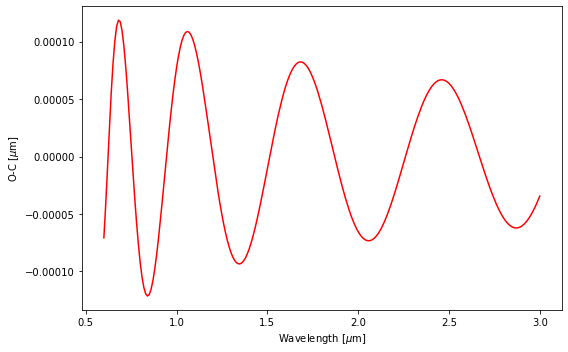

In [4]:
# Check the accuaracy of the inverse transfromation for m=1.
wave = np.linspace(0.6, 3.0, 241)
specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars)
wave_inv, mask = tracepol.specpix_to_wavelength(specpix, tracepars)

plt.figure(figsize=(8,5))

ax1 = plt.subplot(111)
plt.plot(wave, wave - wave_inv, 'r-')
plt.xlabel(r'Wavelength [$\mu$m]')
plt.ylabel(r'O-C [$\mu$m]')

plt.tight_layout()
plt.show()

Next we test the transformations between frames.

In [5]:
specpix_nat = 2048*np.random.rand(1000)
spatpix_nat = 256*np.random.rand(1000)
for frame in ['nat', 'dms', 'sim']:
    specpix, spatpix = tracepol.pix_ref_to_frame(specpix_nat, spatpix_nat, frame=frame)
    specpix_inv, spatpix_inv = tracepol.pix_frame_to_ref(specpix, spatpix, frame=frame)
    print(np.allclose(specpix_nat, specpix_inv), np.allclose(spatpix_nat, spatpix_inv))
    

True True
True True
True True


In [6]:
specpix_nat = 2048*np.random.rand(1000)
spatpix_nat = 256*np.random.rand(1000)
for frame in ['nat', 'dms', 'sim']:
    specpix, spatpix = tracepol.pix_ref_to_frame(specpix_nat, spatpix_nat, frame=frame, subarray='SUBSTRIP96')
    specpix_inv, spatpix_inv = tracepol.pix_frame_to_ref(specpix, spatpix, frame=frame, subarray='SUBSTRIP96')
    print(np.allclose(specpix_nat, specpix_inv), np.allclose(spatpix_nat, spatpix_inv))

True True
True True
True True


Plot the trace profile in every coordinate frame.

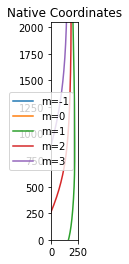

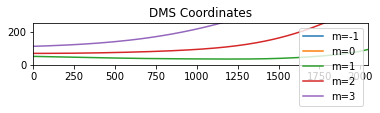

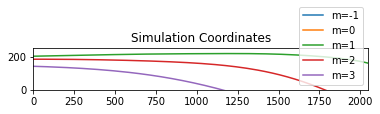

In [7]:
wave = np.linspace(0.5, 3, 251)
plt.subplot(111, aspect=1)
plt.title('Native Coordinates')
for m in [-1, 0, 1, 2, 3]:
    specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, m=m, frame='nat')
    plt.plot(spatpix[mask], specpix[mask], label='m={}'.format(m))
plt.xlim(-0.5, 255.5)
plt.ylim(-0.5, 2047.5)
plt.legend()
plt.show()

wave = np.linspace(0.5, 3, 251)
plt.subplot(111, aspect=1)
plt.title('DMS Coordinates')
for m in [-1, 0, 1, 2, 3]:
    specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, m=m, frame='dms')
    plt.plot(specpix[mask], spatpix[mask], label='m={}'.format(m))
plt.ylim(-0.5, 255.5)
plt.xlim(-0.5, 2047.5)
plt.legend()
plt.show()

wave = np.linspace(0.5, 3, 251)
plt.subplot(111, aspect=1)
plt.title('Simulation Coordinates')
for m in [-1, 0, 1, 2, 3]:
    specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, m=m, frame='sim')
    plt.plot(specpix[mask], spatpix[mask], label='m={}'.format(m))
plt.ylim(-0.5, 255.5)
plt.xlim(-0.5, 2047.5)
plt.legend()
plt.show()

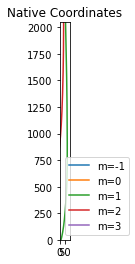

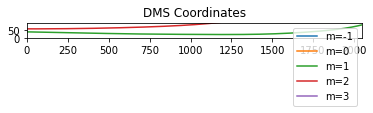

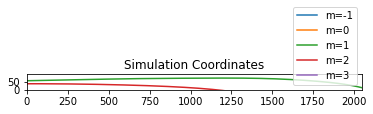

In [8]:
wave = np.linspace(0.5, 3, 251)
plt.subplot(111, aspect=1)
plt.title('Native Coordinates')
for m in [-1, 0, 1, 2, 3]:
    specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, m=m, frame='nat', subarray='SUBSTRIP96')
    plt.plot(spatpix[mask], specpix[mask], label='m={}'.format(m))
plt.xlim(-0.5, 95.5)
plt.ylim(-0.5, 2047.5)
plt.legend()
plt.show()

wave = np.linspace(0.5, 3, 251)
plt.subplot(111, aspect=1)
plt.title('DMS Coordinates')
for m in [-1, 0, 1, 2, 3]:
    specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, m=m, frame='dms', subarray='SUBSTRIP96')
    plt.plot(specpix[mask], spatpix[mask], label='m={}'.format(m))
plt.ylim(-0.5, 95.5)
plt.xlim(-0.5, 2047.5)
plt.legend()
plt.show()

wave = np.linspace(0.5, 3, 251)
plt.subplot(111, aspect=1)
plt.title('Simulation Coordinates')
for m in [-1, 0, 1, 2, 3]:
    specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, m=m, frame='sim', subarray='SUBSTRIP96')
    plt.plot(specpix[mask], spatpix[mask], label='m={}'.format(m))
plt.ylim(-0.5, 95.5)
plt.xlim(-0.5, 2047.5)
plt.legend()
plt.show()

Finaly we test the 2d wavelength map.

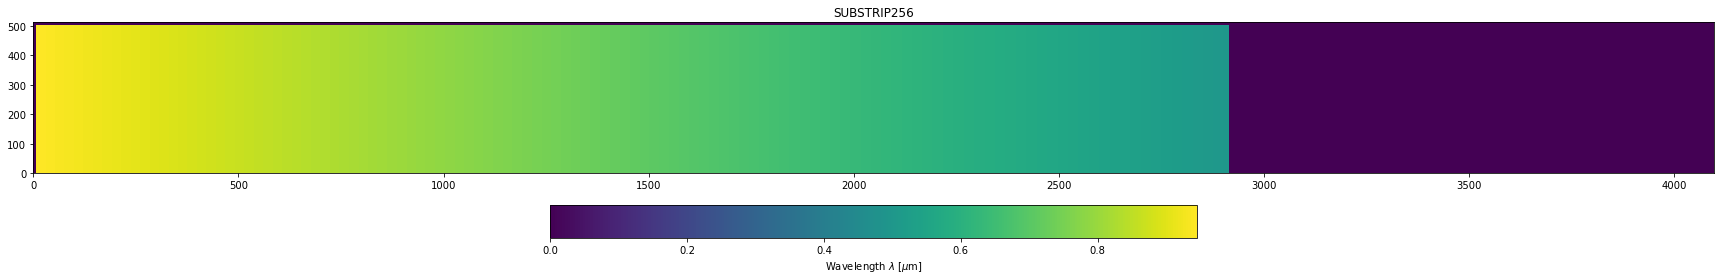

In [10]:
wavelength_map = tracepol.wavelength_map_2d(tracepars, m=3, oversample=2)

plt.figure(figsize=(24, 4))

plt.subplot(111)
plt.title('SUBSTRIP256')

plt.pcolormesh(wavelength_map)

cb = plt.colorbar(orientation='horizontal')
cb.set_label(r'Wavelength $\lambda$ [$\mu$m]')

plt.tight_layout()
plt.show()  

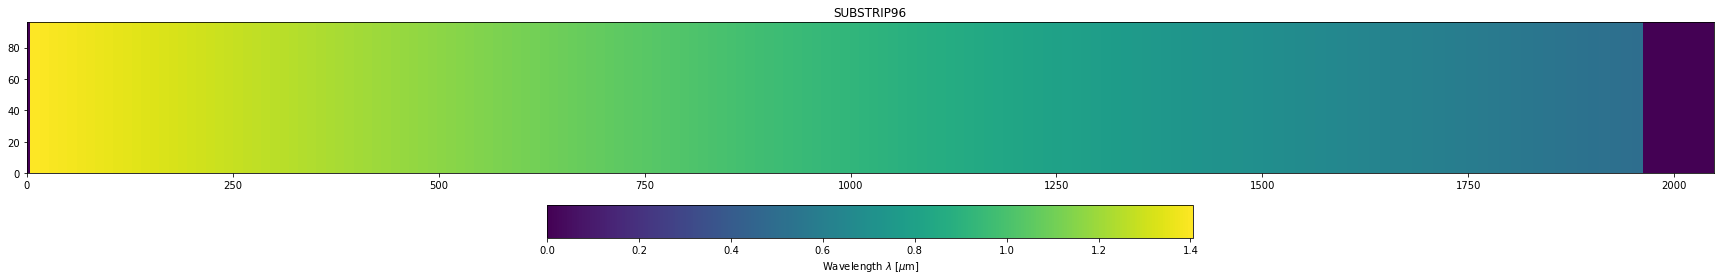

In [11]:
wavelength_map = tracepol.wavelength_map_2d(tracepars, m=2, subarray='SUBSTRIP96', oversample=1)

plt.figure(figsize=(24, 4))

plt.subplot(111)
plt.title('SUBSTRIP96')

plt.pcolormesh(wavelength_map)

cb = plt.colorbar(orientation='horizontal')
cb.set_label(r'Wavelength $\lambda$ [$\mu$m]')

plt.tight_layout()
plt.show()  